In [ ]:
# In the biofurcation diagram for the FS neuron under different injected currents
# the neuron seems to fall into either a chaotic or quasiperiodic state.
# Here we check which it is.

# Do this by looking at the sensitivity to initial conditions and Lyapunov exponents.
# 1) We let the neuron stabilise and then apply a slight perturbation at the start of a current step?

### Can let the neuron reach its steady-state under some current step. Then at this point apply a small perturbation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from AQUA_class import AQUA
from plotting_functions import *

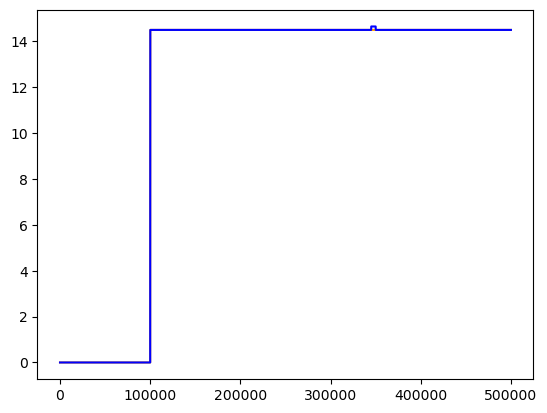

In [ ]:
# FS neuron
a = 0.1
b = 0.2
c = -65
d = 2

#autaptic parameters
e = 0.14    # Bacci et al. 2003
f = -4      # negative for inhibitory interneuron
tau = 10    # ms (Bacci et al. 2003)

#simulation parameters
T = 5       # s
dt = 0.01   # ms
N_iter = int(T*1000/dt)

#Neuron = AQUA(a, b, c, d, e, f, tau)
Neuron = AQUA(a, b, c, d)   # no autapse

#Initialization variables, X_start must contain 3-elements
x_start = np.array([-70, -14, 0]) # [v(0), u(0), w(0)]
t_start = np.array([0])

I_height = 14.5

# Normal current step?
I_1 = np.concatenate([np.zeros(int(0.20*N_iter)), I_height*np.ones(int(0.49*N_iter)), I_height*np.ones(int(0.01*N_iter)), I_height*np.ones(int(0.3*N_iter))])

# Try with perturbation applied once the steady state is found.
I_2 = np.concatenate([np.zeros(int(0.20*N_iter)), I_height*np.ones(int(0.49*N_iter)), (I_height+0.15)*np.ones(int(0.01*N_iter)), I_height*np.ones(int(0.3*N_iter))])

# Run neuron on each injected current
Neuron.Initialise(x_start, t_start)
X_1, T_1, spikes_1 = Neuron.update_RK2(dt, N_iter, I_1)

Neuron.Initialise(x_start, t_start)
X_2, T_2, spikes_2 = Neuron.update_RK2(dt, N_iter, I_2)


plt.plot(I_1, color = 'orange')
plt.plot(I_2, color = 'blue')


range(335000, 375000)
345000


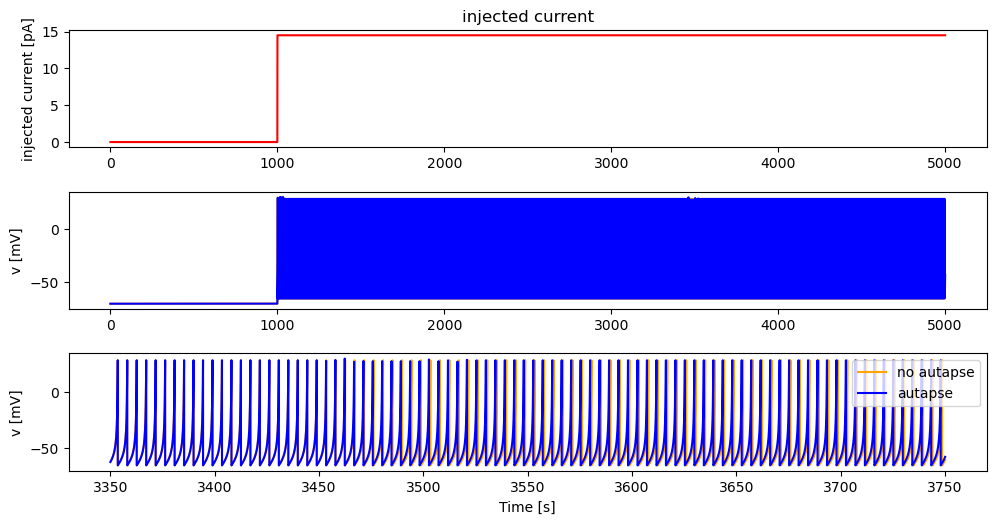

In [4]:

split = range(int(0.67*N_iter), int(0.75*N_iter))
print(split)
print(int(0.69*N_iter))
fig, ax = compare_trains(X_1[0, :], X_2[0, :], T_1, I_1, split)


(881,)
(881,)
[220.2643]
[220.2643]


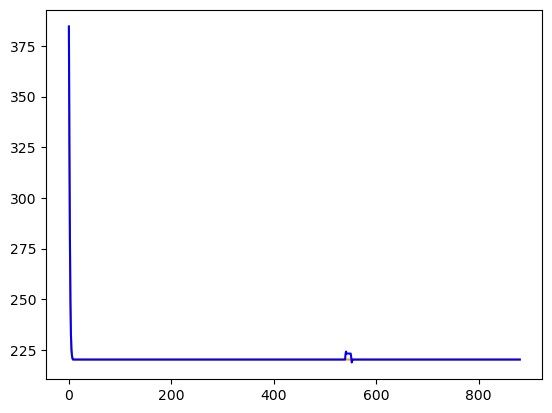

In [5]:
freq_1 = 1000/(np.ediff1d(spikes_1))
print(np.shape(freq_1))
freq_2 = 1000/(np.ediff1d(spikes_2))
print(np.shape(freq_2))

unique_vals1 = np.unique(np.round(freq_1[int(-0.2*len(freq_1)):], decimals = 4))
unique_vals2 = np.unique(np.round(freq_2[int(-0.2*len(freq_2)):], decimals = 4))
print(unique_vals1)
print(unique_vals2)

plt.plot(freq_1[:], color = 'orange')
plt.plot(freq_2[:], color = 'blue')

#### Now try with autapse

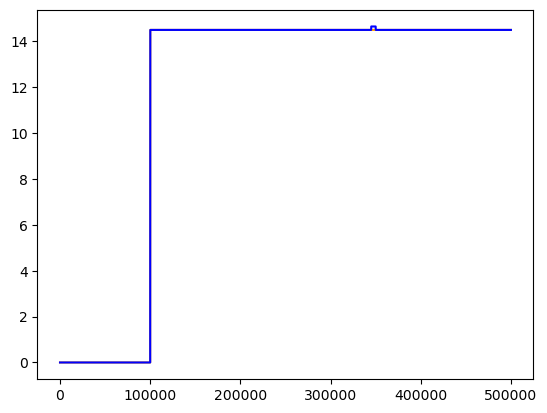

In [6]:
# FS neuron
a = 0.1
b = 0.2
c = -65
d = 2

#autaptic parameters
e = 0.14    # Bacci et al. 2003
f = -4      # negative for inhibitory interneuron
tau = 10    # ms (Bacci et al. 2003)

#simulation parameters
T = 5       # s
dt = 0.01   # ms
N_iter = int(T*1000/dt)

# Initial values
x_start = np.array([-70., 0., 0.])
t_start = np.array([0.])

Neuron = AQUA(a, b, c, d, e, f, tau)

#Initialization variables, X_start must contain 3-elements
x_start = np.array([-70, -14, 0]) # [v(0), u(0), w(0)]
t_start = np.array([0])

I_height = 14.5

# Normal current step?
I_1 = np.concatenate([np.zeros(int(0.20*N_iter)), I_height*np.ones(int(0.49*N_iter)), I_height*np.ones(int(0.01*N_iter)), I_height*np.ones(int(0.3*N_iter))])

# Try with perturbation applied once the steady state is found.
I_2 = np.concatenate([np.zeros(int(0.20*N_iter)), I_height*np.ones(int(0.49*N_iter)), (I_height+0.15)*np.ones(int(0.01*N_iter)), I_height*np.ones(int(0.3*N_iter))])

# Run neuron on each injected current
Neuron.Initialise(x_start, t_start)
X_1, T_1, spikes_1 = Neuron.update_RK2(dt, N_iter, I_1)

Neuron.Initialise(x_start, t_start)
X_2, T_2, spikes_2 = Neuron.update_RK2(dt, N_iter, I_2)


plt.plot(I_1, color = 'orange')
plt.plot(I_2, color = 'blue')

range(335000, 375000)
345000


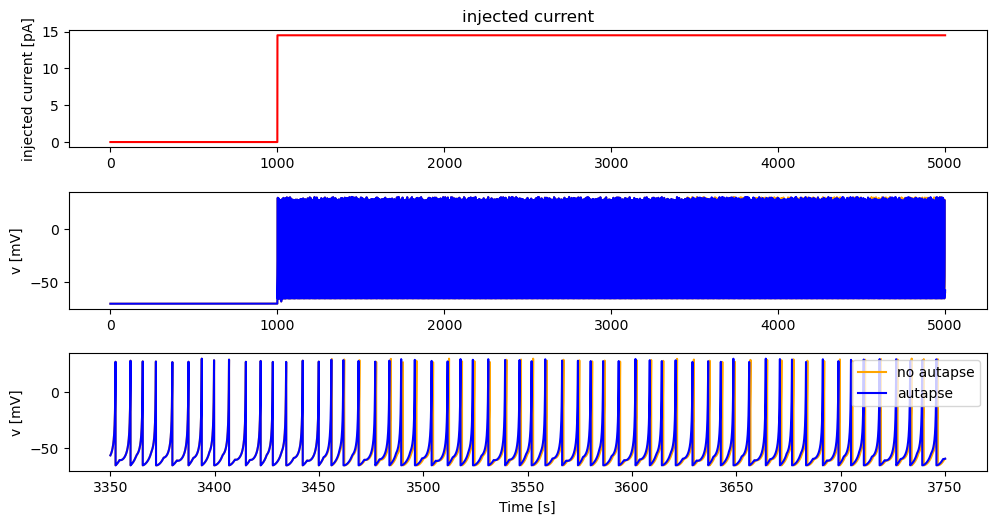

In [7]:
split = range(int(0.67*N_iter), int(0.75*N_iter))
print(split)
print(int(0.69*N_iter))
fig, ax = compare_trains(X_1[0, :], X_2[0, :], T_1, I_1, split)

(577,)
(577,)
[123.3046 123.4568 123.6094 123.7624 123.9157 124.0695 124.2236 124.533
 125.     125.3133 125.7862 126.1034 126.2626 126.5823 126.9036 127.2265
 127.8772 128.7001 129.199  129.3661 129.8701 130.2083 130.719  131.0616
 131.406  131.7523 132.1004 132.8021 133.1558 133.3333 133.5113 134.2282
 134.7709 135.1351 136.0544 137.3626 138.3126 138.8889 140.056  141.6431
 141.844  143.8849 144.0922 145.5604 145.9854 146.8429 147.4926 147.7105
 148.8095 149.0313 149.7006 149.925  150.6024 150.8296 151.0574 152.207
 152.439  152.9052 155.0388 155.2795 156.7398 157.4803 158.2278 158.7302
 160.5136 160.7717 162.0746 163.1321 163.3987 163.9344 164.4737 165.5629
 166.113  167.2241 167.5042 168.3502 168.6341 169.4915 170.068  170.6485
 170.9402 171.5266 171.8213 172.117  172.4138 172.7116 173.0104 173.3102]
[123.4568 123.6094 123.7624 123.9157 124.2236 124.3781 124.533  124.8439
 125.1564 125.4705 125.6281 125.7862 126.1034 126.7427 127.2265 128.041
 128.5347 129.3661 129.5337 130.2083 13

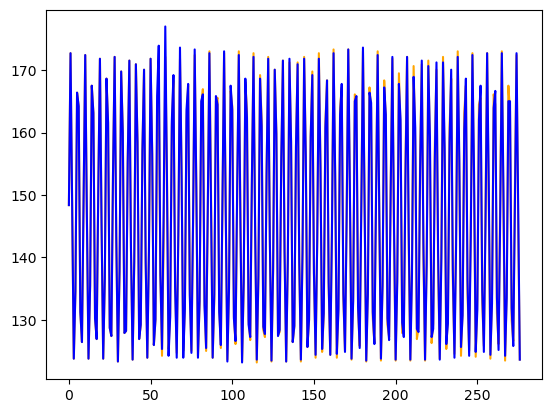

In [10]:
freq_1 = 1000/(np.ediff1d(spikes_1))
print(np.shape(freq_1))
freq_2 = 1000/(np.ediff1d(spikes_2))
print(np.shape(freq_2))

unique_vals1 = np.unique(np.round(freq_1[int(-0.2*len(freq_1)):], decimals = 4))
unique_vals2 = np.unique(np.round(freq_2[int(-0.2*len(freq_2)):], decimals = 4))
print(unique_vals1)
print(unique_vals2)

plt.plot(freq_1[300:], color = 'orange')
plt.plot(freq_2[300:], color = 'blue')